# A. Preparation

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

## Load the Dataset

In [2]:
df = pd.read_csv('../input/iris_nolabels.csv')
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (150, 4)


## Scale the Data
Here we scale the values in each column to the interval [0,1]. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative scaling methods. In yout work on this excersise experiment with other scaling techniques to see if they lead to a more insightful clustering.

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

## Scatterplot Function 
(to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

In [4]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# B. K-Means Clustering

Number of clusters $k$.

In [5]:
k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods.

# C. Manifold-Learning For Visualisation of a Clustering

In [6]:
# append the cluster centers to the dataset
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

## Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [7]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


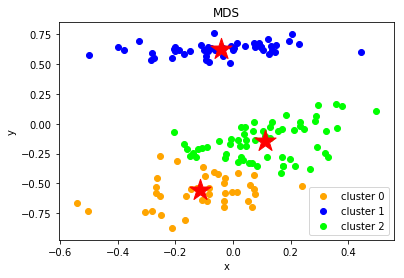

In [8]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

## Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [9]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


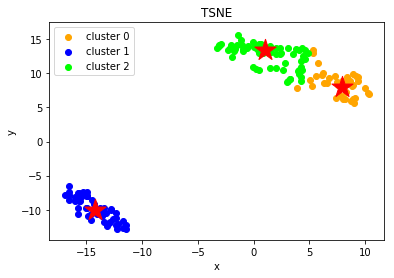

In [10]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

# D. Cluster Analysis

## Add the cluster labels as an extra column in the original dataframe

In [11]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [12]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [13]:
df.tail()

,sepallength,sepalwidth,petallength,petalwidth,cluster
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
149,5.9,3.0,5.1,1.8,2


## Compute the mean value of each attribute for each cluster

In [14]:
df.groupby('cluster').mean()

,sepallength,sepalwidth,petallength,petalwidth
cluster,,,,
0,6.846154,3.082051,5.702564,2.079487
1,5.006000,3.418000,1.464000,0.244000
2,5.888525,2.737705,4.396721,1.418033


## Conclusion

By looking at the table above we can argue that:
* One of the clusters are large iris flowers with the largest petals out of the three types.
* Another cluster are iris flowers with small petals (notably smaller than the other two types) but with somehow wide sepals, the widest sepals of all three types. This is also the cluster that is clearly differentiated from the other two clusters in the scatter plots.
* The third cluster are flowers that are slightly smaller than the flowers in the cluster with the largest flowers with a most notable difference in the width of the petals.

**Note: If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.**

# Further Work

1. Plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. If these methods suggest a different value of k (from the one you used in Task 3), then compute a new k-Means clustering.

2. Apply another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it. Observe the differences between the k-Means clustering and the clustering found by the second algorithm you have tried by visualising the clusterings with an appropriate manifold-learning technique.

To do this refer to the following articles:

* Methods for finding the best k for k-Means:
https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

* Scikit-learn Clustering Algorithms:
https://scikit-learn.org/stable/modules/clustering.html

* Scikit-learn Feature Scalers:
https://scikit-learn.org/stable/modules/preprocessing.html

* Scikit-learn Manifold Learning Methods:
https://scikit-learn.org/stable/modules/manifold.html